# APIs (01.11.2022)
by Thomas Jurczyk (Dr. Eberle Zentrum, Universität Tübingen)

In [3]:
from tools.viz import *

In this session, we will start looking at how to collect data. Of course, there are numerous ways how you can collect your data. Some of which are easy (like having a well-structured database), and some are not (maybe your data has not even been digitized yet).

In this course, we will focus on two ways of how to collect data using the internet. The first are **APIs**, and the second **web scraping** (our next week's topic).

## What is an API?

Generally speaking an API (short for *application programming interface*) ...

> [...] connects computers or pieces of software to each other. It is not intended to be used directly by a person (the end user) other than a computer programmer who is incorporating it into the software. An API is often made up of different parts which act as tools or services that are available to the programmer. A program or a programmer that uses one of these parts is said to call that portion of the API. [Wikipedia](https://en.wikipedia.org/wiki/API)

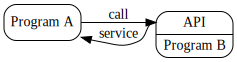

In [4]:
gv_api_general()

The great thing about this approach is that the only thing Program A needs to know is the API (documentation) of Program B. Program A does not need to know how Program B actually implements the services or how Program B really works. The implementation can even change while the API remains stable.

# What is a Web API?

When we are talking about APIs in the context of this seminar (or often data science in general), what we mean are **server-side web APIs**.

> A server-side web API is a programmatic interface consisting of one or more publicly exposed endpoints to a defined request–response message system, typically expressed in JSON or XML, which is exposed via the web—most commonly by means of an HTTP-based web server. ([Wikipedia article](https://en.wikipedia.org/wiki/Web_API))

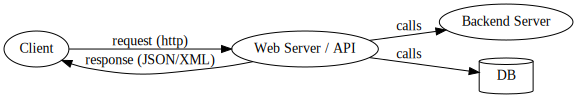

In [5]:
gv_api_web()

# How to communicate with a Web API

As we have seen above, the great thing about most Web APIs we'll be using throughout this course is that you can call them using HTTP as a protocol. This means that you can usually work with you browser to set up some first API calls.

Oftentimes, the queries are simply part of the URL and can be added to the URL using `?` to indicate a querystring.

\[scheme\] **://** \[host/domain\] **/** \[path\] **?** \[query\]

https://newsapi.org/v2/everything?q=biden

As an example, let us build a querystring to get a single article that mentions "Biden" using the [News API](https://newsapi.org/).

We choose the `everything` endpoint for our API calls, meaning that we want to get the full article data available.

A request using the query appropirate query string would look like this:

`https://newsapi.org/v2/everything?q=biden&pageSize=1`

`https://newsapi.org/v2/everything` is the API endpoint and `?q=biden&pageSize=1` our querystring.

Yet, to make this work we still need to authenticate using an API key. Many public APIs need some sort of registration first to avoid abuse and to set up a limit for API calls for each user. Often, they also offer a paid tier or even demand payment right from the beginning, so pay attention to what you are signing up for. 

So, our final URL including the API key looks like this: `https://newsapi.org/v2/everything?q=biden&pageSize=1&apiKey=XXXX`

You can now use this URL in your browser to request an article about/mentioning "Biden" via the News API.

If you have paid attention, you might think: "Well, but isn't this an **application** programming interface, meaning that the idea is that programs (and not users) call an API?" This is correct, and we would usually not manually query a Web API (using our Browser) but use Python for this task.

# Requests

In [7]:
import requests

In [1]:
API_KEY = 'dac93a77b9af4a5eb48929bbac225266'

In [8]:
req = requests.get("https://newsapi.org/v2/everything?q=biden&apiKey=dac93a77b9af4a5eb48929bbac225266")

In [17]:
#help(req)

In [22]:
newsapi_json = req.json()

In [35]:
#for article in newsapi_json['articles']:
    #print(article['title'])

# API Wrapper

In [37]:
from newsapi import NewsApiClient

In [38]:
newsapi = NewsApiClient(api_key='dac93a77b9af4a5eb48929bbac225266')

In [40]:
help(newsapi)

Help on NewsApiClient in module newsapi.newsapi_client object:

class NewsApiClient(builtins.object)
 |  NewsApiClient(api_key, session=None)
 |  
 |  The core client object used to fetch data from News API endpoints.
 |  
 |  :param api_key: Your API key, a length-32 UUID string provided for your News API account.
 |      You must `register <https://newsapi.org/register>`_ for a News API key.
 |  :type api_key: str
 |  
 |  :param session: An optional :class:`requests.Session` instance from which to execute requests.
 |      **Note**: If you provide a ``session`` instance, :class:`NewsApiClient` will *not* close the session
 |      for you.  Remember to call ``session.close()``, or use the session as a context manager, to close
 |      the socket and free up resources.
 |  :type session: `requests.Session <https://2.python-requests.org/en/master/user/advanced/#session-objects>`_ or None
 |  
 |  Methods defined here:
 |  
 |  __init__(self, api_key, session=None)
 |      Initialize se

In [44]:
newsapi.get_everything(q="biden", page=1, page_size=1)

{'status': 'ok',
 'totalResults': 43191,
 'articles': [{'source': {'id': 'the-verge', 'name': 'The Verge'},
   'author': 'Makena Kelly',
   'title': 'Biden plans a speedy rollout for chips funding',
   'description': 'President Joe Biden signed an executive order to get money from the CHIPS and Science Act flowing out to companies like Intel that want to build fabrication sites in the US.',
   'url': 'https://www.theverge.com/2022/8/25/23321723/chips-and-science-act-semiconductor-chip-shortage-joe-biden-white-house',
   'urlToImage': 'https://cdn.vox-cdn.com/thumbor/X4ua27VcsNYGoTiQSs_s-eAACCU=/0x49:3000x1620/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/23970414/52259005895_45b8e2b098_o.jpg',
   'publishedAt': '2022-08-25T16:12:01Z',
   'content': 'He signed an executive order Thursday to kick off the project\r\nImage: White House (Erin Scott) / Flickr\r\nPresident Joe Biden isnt wasting any time in rolling out the $280 billion law to boost domesti… [+2876 chars]'}]}

# API List

1. [News API](https://newsapi.org/)
2. [Twitter](https://developer.twitter.com/en/docs/twitter-api)
    1. [Tweepy](https://www.tweepy.org/)
3. [Wikipedia](https://pypi.org/project/Wikipedia-API/)
4. [Reddit](https://www.reddit.com/) with [praw](https://praw.readthedocs.io/en/stable/index.html)